<a href="https://colab.research.google.com/github/katkamrakesh/Age-Prediction/blob/master/AgePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Age prediction using RESNET 50, [ktrain](https://pypi.org/project/ktrain/) and [UTKFace](http://aicip.eecs.utk.edu/wiki/UTKFace) dataset

1. Clone the data from my git repository

In [1]:
!git clone https://github.com/katkamrakesh/image_datasets.git
datadir = '/content/image_datasets/images'

Cloning into 'image_datasets'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 23785 (delta 0), reused 0 (delta 0), pack-reused 23782
Receiving objects: 100% (23785/23785), 1.27 GiB | 15.04 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24109/24109), done.


## ktrain:

ktrain is a lightweight wrapper for the deep learning library TensorFlow Keras (and other libraries) to help build, train, and deploy neural networks and other machine learning models. It is designed to make deep learning and AI more accessible and easier to apply for both newcomers and experienced practitioners. With only a few lines of code, ktrain allows you to easily and quickly:

In [2]:
!pip install ktrain

     |████████████████████████████████| 25.2MB 120kB/s 
     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 6.7MB 49.0MB/s 
     |████████████████████████████████| 983kB 45.1MB/s 
     |████████████████████████████████| 245kB 58.1MB/s 
     |████████████████████████████████| 675kB 51.1MB/s 
     |████████████████████████████████| 471kB 51.0MB/s 
     |████████████████████████████████| 450kB 37.9MB/s 
     |████████████████████████████████| 3.9MB 50.5MB/s 
     |████████████████████████████████| 3.8MB 51.8MB/s 
     |████████████████████████████████| 1.1MB 49.9MB/s 
     |████████████████████████████████| 890kB 39.4MB/s 
  Created wheel for ktrain: filename=ktrain-0.16.2-cp36-none-any.whl size=25246110 sha256=ee4ee1ab1f7eb6efc4d64ef4ebaa23bac6a8ae59f4f3644203b59700bb85583a
  Stored in directory: /root/.cache/pip/wheels/9c/fe/2f/b43d969ccb9f5b25808a4a68d74fe5f40dfac667037d5d75c0
  Created wheel for keras-bert: filename=keras_bert-0.84.0-cp36-no

In [0]:
## Load the required libraries
%matplotlib inline
import os
import ktrain
from ktrain import vision as viz

UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity.

The target age attribute in this dataset is encoded in the filename. More specifically, filenames are of the form:
- age_gender_race_date&time.jpg where

1. [age] is an integer from 0 to 116, indicating the age
2. [gender] is either 0 (male) or 1 (female)
3. [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
4. [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [4]:
# Define the regex pattern to extract Age from the file name
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'
p = re.compile(pattern)
#r = p.search('100_1_0_20170110183726390.jpg')
#print(r.group(1))

100


In [7]:
(x_train, x_test, preprocess) = viz.images_from_fname(datadir, pattern=pattern,
                      random_state=9, verbose=1,
                      is_regression=True) ##defining it as a regression training

/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/image_datasets/images/61_3_20170109150557335.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/image_datasets/images/53__0_20170116184028385.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/image_datasets/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/image_datasets/images/39_1_20170116174525125.jpg -  skipping this fil

Found 21669 validated image filenames.
Found 2432 validated image filenames.


## Create a Model and Wrap in Learner
We use the image_regression_model function to create a ResNet50 model. By default, the model freezes all layers except the final randomly-initialized dense layer.

In [28]:
#using pretrained_resnet50 as 
model = viz.image_regression_model('pretrained_resnet50',
                                   train_data = x_train,
                                   val_data = x_test,
                                   verbose=1)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 7s 0us/step
pretrained_resnet50 model created.


In [0]:
#wrap model and data in Learner object with batch size 64
learner = ktrain.get_learner(model = model,
                             train_data = x_train,
                             val_data = x_test,
                             batch_size = 64)

## Lets Estimate Learning Rate
We will select a learning rate associated with falling loss from the plot displayed.

In [52]:
learner.lr_find(max_epochs=2)

simulating training for different learning rates... this may take a few moments...
Train for 338 steps
Epoch 1/2
335/338 [============================>.] - ETA: 2s - loss: 26.5665 - mae: 3.7841

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


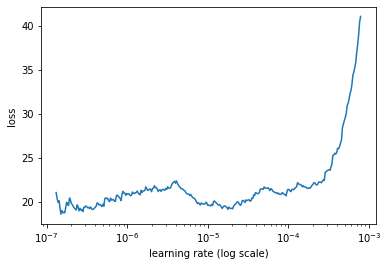

In [53]:
learner.lr_plot()

From the plot above, we will select learning rate of 1e-5

## Lets train the model
We will start to train the model for 3 epochs using a onecycle learning rate policy.

In [30]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/3
339/339 [==============================] - 316s 933ms/step - loss: 385.0191 - mae: 14.7631 - val_loss: 217.6130 - val_mae: 10.9374
Epoch 2/3
339/339 [==============================] - 313s 924ms/step - loss: 172.2006 - mae: 10.0539 - val_loss: 190.2285 - val_mae: 10.4597
Epoch 3/3
339/339 [==============================] - 313s 924ms/step - loss: 142.1461 - mae: 9.1574 - val_loss: 187.3092 - val_mae: 10.3623


Unfreeze all but the first 15 layers and train it with 2 epochs with same learning rate

In [31]:
learner.freeze(15)

learner.fit_onecycle(1e-5, 2)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/2
339/339 [==============================] - 344s 1s/step - loss: 103.9434 - mae: 7.6478 - val_loss: 251.9151 - val_mae: 11.9859
Epoch 2/2
339/339 [==============================] - 338s 998ms/step - loss: 41.5421 - mae: 4.8878 - val_loss: 94.2908 - val_mae: 6.7354


After 5 epochs, our validation MAE is 4.88. That is, on average, our age predictions are off about 5 years. we can train it further to minimize the MAE

## Make Predictions
Let's make predictions on individual photos. I have choosen one random photo from the utk image dataset, one real photo and 3 AI created photos from https://thispersondoesnotexist.com/.

In [0]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [0]:
def show_prediction(fname):
  fname = datadir + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  viz.show_image(fname)
  print(f"Actual Age: ", actual, "| Predicted Age: ",pred)

Actual Age:  49 | Predicted Age:  43.0


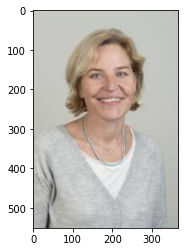

In [51]:
show_prediction('49_1_0_20170109013132704.jpg')

In [0]:
def show_age(fname, actual_age):
  pred = round(predictor.predict_filename(fname)[0])
  viz.show_image(fname)
  print("Actual Age: ", actual_age, "| predicted Age: ", pred)

In [0]:
predictor.save('/content/age_prediction')

Actual Age:  6 | predicted Age:  7.0


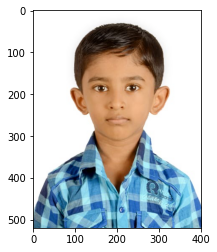

In [49]:
show_age('pic1.JPG',6)

Actual Age:  Unknown | predicted Age:  29.0


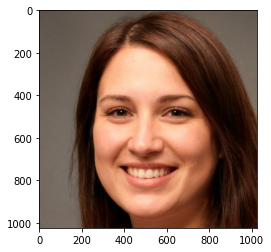

In [55]:
show_age('pic7.jpg','Unknown')

Actual Age:  Unknown | predicted Age:  21.0


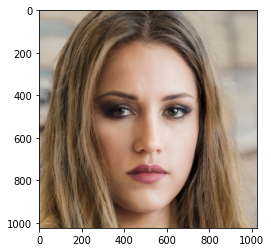

In [56]:
show_age('pic8.jpg','Unknown')

Actual Age:  Unknown | predicted Age:  54.0


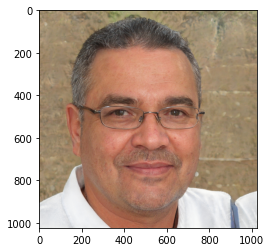

In [58]:
show_age('pic9.jpg','Unknown')

## Conclusion
With learning rate of 1e-5 and 5 epoch, the model has been trained  well and done pretty good job in predicting the age on real photo and aritifically created images. With more layers freezing and onecycle training, can minimize the MAE value further down.